In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
hy=  pd.read_csv('HY_Category_bds_031623.csv')
avg= pd.read_csv('HY_Category_avg_031623.csv')

In [42]:
hy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CUSIP         1547 non-null   object 
 1   10/31/22 MTD  1547 non-null   float64
 2   11/30/22 MTD  1547 non-null   float64
 3   12/31/22 MTD  1547 non-null   float64
 4   01/31/23 MTD  1547 non-null   float64
 5   02/28/23 MTD  1547 non-null   float64
dtypes: float64(5), object(1)
memory usage: 72.6+ KB


In [43]:
hy.describe()

,10/31/22 MTD,11/30/22 MTD,12/31/22 MTD,01/31/23 MTD,02/28/23 MTD
count,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000
mean,2.515469,1.964001,-0.300692,3.778455,-0.796264
std,4.266524,5.018319,3.683421,3.956733,3.446002
min,-37.470000,-36.600000,-36.460000,-14.820000,-22.550000
25%,0.990000,0.645000,-1.300000,1.760000,-2.040000
50%,2.620000,1.730000,-0.040000,3.010000,-1.010000
75%,4.355000,3.170000,1.030000,4.685000,0.155000
max,24.740000,40.880000,19.780000,44.620000,35.560000


In [44]:
from sklearn.cluster import KMeans

In [45]:
kmeans = KMeans(n_clusters=6)

In [46]:
kmeans.fit(hy.drop('CUSIP',axis=1))

KMeans(n_clusters=6)

In [47]:
kmeans.cluster_centers_

array([[  2.3018794 ,   1.71435176,   0.12619095,   2.34982915,
         -1.04562814],
       [  7.21714286,   0.83694805,  -1.63022727,   5.19399351,
         -1.70308442],
       [ -0.56225434,   5.68942197,   0.97508671,   5.5716763 ,
          1.05462428],
       [ -7.68272727, -24.55727273,   8.88272727,  11.21545455,
         11.89181818],
       [ -4.40611111,  -6.11361111, -10.42055556,  17.68722222,
         -0.13333333],
       [-11.72583333,  24.19583333,   0.83833333,   7.64291667,
          1.02791667]])

In [48]:
arr = kmeans.labels_
arr

array([1, 1, 2, ..., 0, 2, 5])

<AxesSubplot:>

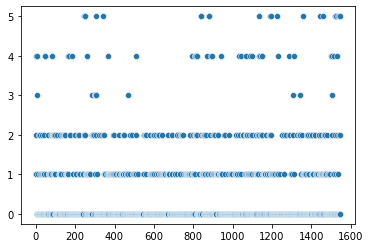

In [49]:
sns.scatterplot(data=arr)

In [50]:
hy['Cluster'] = arr.tolist()

In [51]:
hy

,CUSIP,10/31/22 MTD,11/30/22 MTD,12/31/22 MTD,01/31/23 MTD,02/28/23 MTD,Cluster
0,00081TAK4,5.91,5.71,-0.53,5.15,-4.86,1
1,00119LAA9,8.18,0.07,-0.83,3.06,-0.35,1
2,00150LAB7,0.98,2.82,-1.15,5.73,2.45,2
3,00164VAE3,2.49,-2.44,-10.65,10.85,11.87,4
4,00164VAF0,3.64,-3.42,-14.16,-1.05,19.90,0
...,...,...,...,...,...,...,...
1542,BN1555661,2.54,2.08,0.33,3.77,3.03,0
1543,BO2045322,6.19,4.92,-0.11,1.40,-2.14,0
1544,BQ7990238,1.81,1.05,-0.54,0.11,1.69,0
1545,ZO4199154,3.14,9.20,1.81,1.82,-3.71,2


In [52]:
hy.groupby(['Cluster']).size()

Cluster
0    995
1    308
2    173
3     11
4     36
5     24
dtype: int64

In [53]:
 hy.to_excel("output_0316_6.xlsx")

In [54]:
kmeans.fit(avg.drop('CUSIP',axis=1))

KMeans(n_clusters=6)

In [55]:
arr2 = kmeans.labels_
arr2

array([5, 5, 5, ..., 4, 4, 4])

In [56]:
avg['Cluster'] = arr2.tolist()

<AxesSubplot:xlabel='Avg_Pos', ylabel='Avg_Neg'>

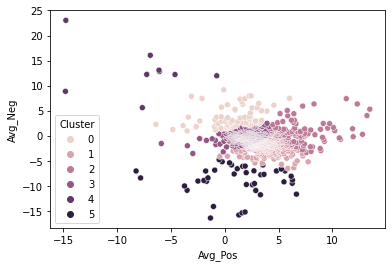

In [57]:
sns.scatterplot(x='Avg_Pos',y='Avg_Neg',data=avg,hue='Cluster',cmap='rainbow')